# Summer School on Biomedical Imaging with Deep Learning

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/albarqounilab/BILD-Summer-School/blob/main/notebooks/day2/segmentation.ipynb)

![alt_text](https://raw.githubusercontent.com/albarqounilab/BILD-Summer-School/refs/heads/main/images/helpers/notebook-banner.png)

BILD 2025 is organized under the umbrella of the [Strategic Arab-German Network for Affordable and Democratized AI in Healthcare (SANAD)](https://albarqouni.github.io/funded/sanad/), uniting academic excellence and technological innovation across borders. This year’s edition is organized by the [Albarqouni Lab](https://albarqouni.github.io/) at the [University Hospital Bonn](https://www.ukbonn.de/) and the [University of Bonn](https://www.uni-bonn.de/en). We are proud to partner with leading institutions in the region—Lebanese American University, University of Tunis El Manar, and Duhok Polytechnic University — to deliver a truly international learning experience. Over five intensive days in Tunis, you will explore cutting-edge deep-learning techniques for medical imaging through expert lectures, hands-on labs, and collaborative case studies. Engage with peers and faculty from Germany, Lebanon, Iraq, and Tunisia as you develop practical skills in building and deploying AI models for real-world healthcare challenges. We look forward to an inspiring week of interdisciplinary exchange and the shared commitment to advancing affordable, life-saving AI in medicine.


# Introduction to PyTorch
## Introduction

Welcome to our PyTorch tutorial for the Deep Learning course! The following notebook is meant to give a short introduction to PyTorch basics, and get you setup for writing your own neural networks. PyTorch is an open source machine learning framework that allows you to write your own neural networks and optimize them efficiently. However, PyTorch is not the only framework of its kind. Alternatives to PyTorch include TensorFlow, JAX and Caffe.


We will use a set of standard libraries that are often used in machine learning projects. If you are running this notebook on Google Colab, all libraries should be pre-installed.

In [2]:
#@title Import Standard libraries
import os
import math
import numpy as np
import time

## Imports for plotting
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg', 'pdf') # For export
from matplotlib.colors import to_rgba
import seaborn as sns
sns.set()

## Progress bar
from tqdm.notebook import tqdm

/tmp/ipython-input-2271311397.py:11: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg', 'pdf') # For export


#The Basics of PyTorch

We will start with reviewing the very basic concepts of PyTorch.

So, let's start with importing PyTorch. The package is called `torch`, based on its original framework [Torch](http://torch.ch/). As a first step, we can check its version:

In [4]:
import torch
print("Using torch", torch.__version__)

Using torch 2.6.0+cu124


As in every machine learning framework, PyTorch provides functions that are stochastic like generating random numbers. However, a very good practice is to setup your code to be reproducible with the exact same random numbers. This is why we set a seed below.

In [4]:
torch.manual_seed(42) # Setting the seed

### Tensors

Tensors are the PyTorch equivalent to Numpy arrays, with the addition to also have support for GPU acceleration (more on that later).
The name "tensor" is a generalization of concepts you already know. For instance, a vector is a 1-D tensor, and a matrix a 2-D tensor. When working with neural networks, we will use tensors of various shapes and number of dimensions.

Most common functions you know from numpy can be used on tensors as well. Actually, since numpy arrays are so similar to tensors, we can convert most tensors to numpy arrays (and back) but we don't need it too often.

#### Initialization

Let's first start by looking at different ways of creating a tensor. There are many possible options, the simplest one is to call `torch.Tensor` passing the desired shape as input argument:

In [5]:
x = torch.Tensor(2, 3, 4)
print(x)

tensor([[[-2.9626e+33,  1.8999e-24,  4.0286e-15,  1.4862e-30],
         [-4.5018e+31,  1.7383e-30,  4.1601e-31,  9.7002e-35],
         [ 2.2046e-38, -1.7585e+29,  1.6890e-30, -6.3122e+32]],

        [[ 7.2702e-27,  9.9381e-28,  1.0528e-21,  3.8713e+26],
         [ 2.1633e-23,  2.3472e-03, -3.2309e+12,  3.2029e-36],
         [-4.6973e-34,  4.7771e-25,  1.8176e-33,  4.1662e-25]]])


The function `torch.Tensor` allocates memory for the desired tensor, but reuses any values that have already been in the memory. To directly assign values to the tensor during initialization, there are many alternatives including:

* `torch.zeros`: Creates a tensor filled with zeros
* `torch.ones`: Creates a tensor filled with ones
* `torch.rand`: Creates a tensor with random values uniformly sampled between 0 and 1
* `torch.randn`: Creates a tensor with random values sampled from a normal distribution with mean 0 and variance 1
* `torch.arange`: Creates a tensor containing the values $N,N+1,N+2,...,M$
* `torch.Tensor` (input list): Creates a tensor from the list elements you provide

In [6]:
# Create a tensor from a (nested) list
x = torch.Tensor([[1, 2], [3, 4]])
print(x)

tensor([[1., 2.],
        [3., 4.]])


In [7]:
# Create a tensor with random values between 0 and 1 with the shape [2, 3, 4]
x = torch.rand(2, 3, 4)
print(x)

tensor([[[0.8823, 0.9150, 0.3829, 0.9593],
         [0.3904, 0.6009, 0.2566, 0.7936],
         [0.9408, 0.1332, 0.9346, 0.5936]],

        [[0.8694, 0.5677, 0.7411, 0.4294],
         [0.8854, 0.5739, 0.2666, 0.6274],
         [0.2696, 0.4414, 0.2969, 0.8317]]])


You can obtain the shape of a tensor in the same way as in numpy (`x.shape`), or using the `.size` method:

In [8]:
shape = x.shape
print("Shape:", x.shape)

size = x.size()
print("Size:", size)

dim1, dim2, dim3 = x.size()
print("Size:", dim1, dim2, dim3)

Shape: torch.Size([2, 3, 4])
Size: torch.Size([2, 3, 4])
Size: 2 3 4


#### Tensor to Numpy, and Numpy to Tensor

Tensors can be converted to numpy arrays, and numpy arrays back to tensors. To transform a numpy array into a tensor, we can use the function `torch.from_numpy`:

In [9]:
np_arr = np.array([[1, 2], [3, 4]])
tensor = torch.from_numpy(np_arr)

print("Numpy array:", np_arr)
print("PyTorch tensor:", tensor)

Numpy array: [[1 2]
 [3 4]]
PyTorch tensor: tensor([[1, 2],
        [3, 4]])


To transform a PyTorch tensor back to a numpy array, we can use the function `.numpy()` on tensors:

In [10]:
tensor = torch.arange(4)
np_arr = tensor.numpy()

print("PyTorch tensor:", tensor)
print("Numpy array:", np_arr)

PyTorch tensor: tensor([0, 1, 2, 3])
Numpy array: [0 1 2 3]


*The* conversion of tensors to numpy require the tensor to be on the CPU, and not the GPU (more on GPU support in a later section). In case you have a tensor on GPU, you need to call `.cpu()` on the tensor beforehand. Hence, you get a line like `np_arr = tensor.cpu().numpy()`.

#### Operations

Most operations that exist in numpy, also exist in PyTorch. A full list of operations can be found in the [PyTorch documentation](https://pytorch.org/docs/stable/tensors.html#), but we will review the most important ones here.

The simplest operation is to add two tensors:

In [11]:
x1 = torch.rand(2, 3)
x2 = torch.rand(2, 3)
y = x1 + x2

print("X1", x1)
print("X2", x2)
print("Y", y)

X1 tensor([[0.1053, 0.2695, 0.3588],
        [0.1994, 0.5472, 0.0062]])
X2 tensor([[0.9516, 0.0753, 0.8860],
        [0.5832, 0.3376, 0.8090]])
Y tensor([[1.0569, 0.3448, 1.2448],
        [0.7826, 0.8848, 0.8151]])


Calling `x1 + x2` creates a new tensor containing the sum of the two inputs. However, we can also use in-place operations that are applied directly on the memory of a tensor. We therefore change the values of `x2` without the chance to re-accessing the values of `x2` before the operation. An example is shown below:

In [12]:
x1 = torch.rand(2, 3)
x2 = torch.rand(2, 3)
print("X1 (before)", x1)
print("X2 (before)", x2)

x2.add_(x1)
print("X1 (after)", x1)
print("X2 (after)", x2)

X1 (before) tensor([[0.5779, 0.9040, 0.5547],
        [0.3423, 0.6343, 0.3644]])
X2 (before) tensor([[0.7104, 0.9464, 0.7890],
        [0.2814, 0.7886, 0.5895]])
X1 (after) tensor([[0.5779, 0.9040, 0.5547],
        [0.3423, 0.6343, 0.3644]])
X2 (after) tensor([[1.2884, 1.8504, 1.3437],
        [0.6237, 1.4230, 0.9539]])


Another common operation aims at changing the shape of a tensor. A tensor of size (2,3) can be re-organized to any other shape with the same number of elements (e.g. a tensor of size (6), or (3,2), ...). In PyTorch, this operation is called `view`:

In [13]:
x = torch.arange(6)
print("X", x)

X tensor([0, 1, 2, 3, 4, 5])


In [14]:
x = x.view(2, 3)
print("X", x)

X tensor([[0, 1, 2],
        [3, 4, 5]])


In [15]:
x = x.permute(1, 0) # Swapping dimension 0 and 1
print("X", x)

X tensor([[0, 3],
        [1, 4],
        [2, 5]])


Other commonly used operations include matrix multiplications, which are essential for neural networks. Quite often, we have an input vector $\mathbf{x}$, which is transformed using a learned weight matrix $\mathbf{W}$. There are multiple ways and functions to perform matrix multiplication, some of which we list below:

* `torch.matmul`: Performs the matrix product over two tensors, where the specific behavior depends on the dimensions. If both inputs are matrices (2-dimensional tensors), it performs the standard matrix product. For higher dimensional inputs, the function supports broadcasting (for details see the [documentation](https://pytorch.org/docs/stable/generated/torch.matmul.html?highlight=matmul#torch.matmul)). Can also be written as `a @ b`, similar to numpy.
* `torch.mm`: Performs the matrix product over two matrices, but doesn't support broadcasting (see [documentation](https://pytorch.org/docs/stable/generated/torch.mm.html?highlight=torch%20mm#torch.mm))
* `torch.bmm`: Performs the matrix product with a support batch dimension. If the first tensor $T$ is of shape ($b\times n\times m$), and the second tensor $R$ ($b\times m\times p$), the output $O$ is of shape ($b\times n\times p$), and has been calculated by performing $b$ matrix multiplications of the submatrices of $T$ and $R$: $O_i = T_i @ R_i$
* `torch.einsum`: Performs matrix multiplications and more (i.e. sums of products) using the Einstein summation convention. Explanation of the Einstein sum can be found in assignment 1.

Usually, we use `torch.matmul` or `torch.bmm`. We can try a matrix multiplication with `torch.matmul` below.

In [16]:
x = torch.arange(6)
x = x.view(2, 3)
print("X", x)

X tensor([[0, 1, 2],
        [3, 4, 5]])


In [17]:
W = torch.arange(9).view(3, 3) # We can also stack multiple operations in a single line
print("W", W)

W tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])


In [18]:
h = torch.matmul(x, W) # Verify the result by calculating it by hand too!
print("h", h)

h tensor([[15, 18, 21],
        [42, 54, 66]])


#### Indexing

We often have the situation where we need to select a part of a tensor. Indexing works just like in numpy, so let's try it:

In [19]:
x = torch.arange(12).view(3, 4)
print("X", x)

X tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])


In [20]:
print(x[:, 1])   # Second column

tensor([1, 5, 9])


In [21]:
print(x[0])      # First row

tensor([0, 1, 2, 3])


In [22]:
print(x[:2, -1]) # First two rows, last column

tensor([3, 7])


In [23]:
print(x[1:3, :]) # Middle two rows

tensor([[ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])


### Dynamic Computation Graph and Backpropagation

One of the main reasons for using PyTorch in Deep Learning projects is that we can automatically get **gradients/derivatives** of functions that we define. We will mainly use PyTorch for implementing neural networks, and they are just fancy functions. If we use weight matrices in our function that we want to learn, then those are called the **parameters** or simply the **weights**.

If our neural network would output a single scalar value, we would talk about taking the **derivative**, but you will see that quite often we will have **multiple** output variables ("values"); in that case we talk about **gradients**. It's a more general term.

Given an input $\mathbf{x}$, we define our function by **manipulating** that input, usually by matrix-multiplications with weight matrices and additions with so-called bias vectors. As we manipulate our input, we are automatically creating a **computational graph**. This graph shows how to arrive at our output from our input.
PyTorch is a **define-by-run** framework; this means that we can just do our manipulations, and PyTorch will keep track of that graph for us. Thus, we create a dynamic computation graph along the way.

So, to recap: the only thing we have to do is to compute the **output**, and then we can ask PyTorch to automatically get the **gradients**.

The first thing we have to do is to specify which tensors require gradients. By default, when we create a tensor, it does not require gradients.

In [24]:
x = torch.ones((3,))
print(x.requires_grad)

False


We can change this for an existing tensor using the function `requires_grad_()` (underscore indicating that this is a in-place operation). Alternatively, when creating a tensor, you can pass the argument `requires_grad=True` to most initializers we have seen above.

In [25]:
x.requires_grad_(True)
print(x.requires_grad)

True


### GPU support

A crucial feature of PyTorch is the support of GPUs, short for Graphics Processing Unit. A GPU can perform many thousands of small operations in parallel, making it very well suitable for performing large matrix operations in neural networks. When comparing GPUs to CPUs, we can list the following main differences (credit: [Kevin Krewell, 2009](https://blogs.nvidia.com/blog/2009/12/16/whats-the-difference-between-a-cpu-and-a-gpu/))

![GPU vs CPU comparison](https://drive.google.com/uc?export=view&id=1PxpJgELgB1aEZrdDY6lkeok8nTNtYOW6)

CPUs and GPUs have both different advantages and disadvantages, which is why many computers contain both components and use them for different tasks. In case you are not familiar with GPUs, you can read up more details in this [NVIDIA blog post](https://blogs.nvidia.com/blog/2009/12/16/whats-the-difference-between-a-cpu-and-a-gpu/) or [here](https://www.intel.com/content/www/us/en/products/docs/processors/what-is-a-gpu.html).

GPUs can accelerate the training of your network up to a factor of $100$ which is essential for large neural networks. PyTorch implements a lot of functionality for supporting GPUs (mostly those of NVIDIA due to the libraries [CUDA](https://developer.nvidia.com/cuda-zone) and [cuDNN](https://developer.nvidia.com/cudnn)). First, let's check whether you have a GPU available:

In [26]:
gpu_avail = torch.cuda.is_available()
print(f"Is the GPU available? {gpu_avail}")

Is the GPU available? False


If you have a GPU on your computer but the command above returns False, make sure you have the correct CUDA-version installed. On Google Colab, make sure that you have selected a GPU in your runtime setup (in the menu, check under Runtime -> Change runtime type).

By default, all tensors you create are stored on the CPU. We can push a tensor to the GPU by using the function .to(...), or .cuda(). However, it is often a good practice to define a device object in your code which points to the GPU if you have one, and otherwise to the CPU. Then, you can write your code with respect to this device object, and it allows you to run the same code on both a CPU-only system, and one with a GPU. Let's try it below. We can specify the device as follows:

In [5]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print("Device", device)

Device cuda


Now let's create a tensor and push it to the device:

In [7]:
x = torch.zeros(2, 3)
x = x.to(device)
print("X", x)

X tensor([[0., 0., 0.],
        [0., 0., 0.]], device='cuda:0')


In case you have a GPU, you should now see the attribute `device='cuda:0'` being printed next to your tensor. The zero next to cuda indicates that this is the zero-th GPU device on your computer. PyTorch also supports multi-GPU systems, but this you will only need once you have very big networks to train (if interested, see the [PyTorch documentation](https://pytorch.org/docs/stable/distributed.html#distributed-basics)). We can also compare the runtime of a large matrix multiplication on the CPU with a operation on the GPU:

In [6]:
x = torch.randn(5000, 5000)

## CPU version
start_time = time.time()
_ = torch.matmul(x, x)
end_time = time.time()
print(f"CPU time: {(end_time - start_time):6.5f}s")

## GPU version
x = x.to(device)
_ = torch.matmul(x, x)  # First operation to 'burn in' GPU
# CUDA is asynchronous, so we need to use different timing functions
start = torch.cuda.Event(enable_timing=True)
end = torch.cuda.Event(enable_timing=True)
start.record()
_ = torch.matmul(x, x)
end.record()
torch.cuda.synchronize()  # Waits for everything to finish running on the GPU
print(f"GPU time: {0.001 * start.elapsed_time(end):6.5f}s")  # Milliseconds to seconds

CPU time: 2.16336s
GPU time: 0.07165s


# Building Neural Networks with torch.nn

PyTorch provides the torch.nn package to easily build neural networks using pre-defined layers and activation functions. Instead of managing tensors and gradients manually, torch.nn.Module helps organize layers and the forward pass.

In [19]:
import torch.nn as nn
import torch.nn.functional as F

class SimpleClassifier(nn.Module):
    def __init__(self, num_inputs, num_hidden, num_outputs):
        super().__init__()
        self.linear1 = nn.Linear(num_inputs, num_hidden)
        self.act_fn = nn.Tanh()
        self.linear2 = nn.Linear(num_hidden, num_outputs)

    def forward(self, x):
        x = self.linear1(x)
        x = self.act_fn(x)
        x = self.linear2(x)
        return x

model = SimpleClassifier(num_inputs=2, num_hidden=4, num_outputs=1)
print(model)

SimpleClassifier(
  (linear1): Linear(in_features=2, out_features=4, bias=True)
  (act_fn): Tanh()
  (linear2): Linear(in_features=4, out_features=1, bias=True)
)


# Dataset and DataLoader: Handling Data Efficiently

PyTorch uses Dataset and DataLoader classes for flexible, efficient data management. Dataset provides access to data points and labels, and DataLoader batches and shuffles data automatically.

In [20]:
from torch.utils.data import Dataset, DataLoader

class XORDataset(Dataset):
    def __init__(self, size):
        self.size = size
        self.data = torch.randint(0, 2, (size, 2), dtype=torch.float32)
        self.label = (self.data.sum(dim=1) == 1).long()

    def __len__(self):
        return self.size

    def __getitem__(self, idx):
        return self.data[idx], self.label[idx]

dataset = XORDataset(size=200)
data_loader = DataLoader(dataset, batch_size=8, shuffle=True)

data_inputs, data_labels = next(iter(data_loader))
print(data_inputs.shape, data_labels.shape)


torch.Size([8, 2]) torch.Size([8])


# Loss and Optimizer: Training Essentials

The loss function measures prediction error. PyTorch provides many loss modules like nn.BCEWithLogitsLoss for binary classification. Optimizers like SGD update model parameters using gradients.

In [21]:
import torch.optim as optim
loss_module = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Training Loop: Putting It All Together

The training loop consists of loading batches, computing predictions, calculating loss, performing backpropagation, and updating parameters. Remember to zero gradients before backpropagation.

In [22]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

def train_model(model, optimizer, data_loader, loss_module, epochs=10):
    model.train()
    for epoch in range(epochs):
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device).float()
            preds = model(inputs).squeeze(1)
            loss = loss_module(preds, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

train_model(model, optimizer, data_loader, loss_module)

# Saving and Loading Models

After training, save model parameters with state_dict. Later, you can load them to recreate the model without retraining.

In [23]:
torch.save(model.state_dict(), "model.pth")

loaded_model = SimpleClassifier(num_inputs=2, num_hidden=4, num_outputs=1)
loaded_model.load_state_dict(torch.load("model.pth"))

<All keys matched successfully>

#  Evaluating the Model on a Test Set

After training, evaluate the model on unseen data (test set). Use accuracy as a metric: the percentage of correct predictions out of all predictions. During evaluation, disable gradient tracking with torch.no_grad() for faster computation and set the model to evaluation mode with model.eval().

In [24]:
test_dataset = XORDataset(size=500)
test_data_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

def eval_model(model, data_loader):
    model.eval()
    true_preds, total_preds = 0, 0
    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            preds = torch.sigmoid(model(inputs).squeeze(1))
            pred_labels = (preds >= 0.5).long()
            true_preds += (pred_labels == labels).sum().item()
            total_preds += labels.size(0)
    accuracy = true_preds / total_preds
    print(f"Model accuracy: {accuracy * 100:.2f}%")

eval_model(model, test_data_loader)

Model accuracy: 74.60%


# Visualizing the Model’s Decision Boundaries

Visualize what the model has learned by plotting its predicted classes over a grid of input points. This shows the boundary between classes, helping understand model behavior.

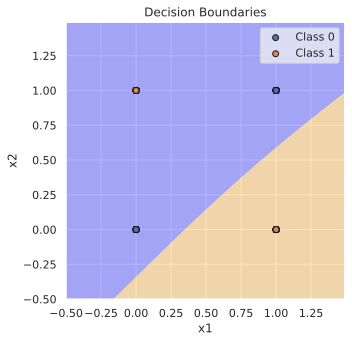

In [25]:
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba

@torch.no_grad()
def visualize_classification(model, data, labels):
    model.to(device)
    x_vals = torch.arange(-0.5, 1.5, 0.01, device=device)
    xx1, xx2 = torch.meshgrid(x_vals, x_vals, indexing='ij')
    grid_points = torch.stack([xx1, xx2], dim=-1).view(-1, 2)

    preds = torch.sigmoid(model(grid_points)).cpu().numpy().reshape(xx1.shape)
    data = data.cpu().numpy()
    labels = labels.cpu().numpy()

    plt.figure(figsize=(5,5))
    plt.contourf(xx1.cpu(), xx2.cpu(), preds, levels=[0,0.5,1], alpha=0.3, colors=['blue','orange'])
    plt.scatter(data[labels==0][:,0], data[labels==0][:,1], label='Class 0', edgecolor='k')
    plt.scatter(data[labels==1][:,0], data[labels==1][:,1], label='Class 1', edgecolor='k')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.title("Decision Boundaries")
    plt.show()

visualize_classification(model, dataset.data, dataset.label)


#Working with Medical Images in PyTorch (DICOM Example)
##Introduction to DICOM


DICOM (Digital Imaging and Communications in Medicine) is the standard file format used to store and transmit medical imaging data like CT scans, MRI, and X-rays. Unlike typical image formats such as JPEG or PNG, DICOM files contain both the image pixels and essential metadata — including patient details, acquisition parameters, and device info.

In this section, you will learn how to:

- Load and inspect a DICOM medical image

- Convert the image into a PyTorch tensor suitable for deep learning

- Preprocess the image (normalization and resizing) for a neural network

- Understand key DICOM metadata

- Prepare the data for use in GPU-based PyTorch models

## Download and Inspect Dataset

In [28]:
DATA_PATH = './'

# Download example dataset (Brain MRI DICOM files)
!curl https://uni-bonn.sciebo.de/s/s1t8QUZ02MF1Qoh/download --output {DATA_PATH}/data.zip
!unzip -q {DATA_PATH}/data.zip -d {DATA_PATH}

import os

# List first few files in dataset folder to verify
for root, dirs, files in os.walk(DATA_PATH):
    for file in files[:5]:
        print(os.path.join(root, file))


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1730M  100 1730M    0     0  96.6M      0  0:00:17  0:00:17 --:--:--  128M
replace ./data/ReportsDATASET.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: ./data.zip
./model.pth
./.config/active_config
./.config/.last_survey_prompt.yaml
./.config/.last_update_check.json
./.config/.last_opt_in_prompt.yaml
./.config/gce
./.config/configurations/config_default
./.config/logs/2025.08.07/13.42.07.355819.log
./.config/logs/2025.08.07/13.42.26.351069.log
./.config/logs/2025.08.07/13.42.17.248935.log
./.config/logs/2025.08.07/13.41.46.739789.log
./.config/logs/2025.08.07/13.42.25.647837.log
./data/ReportsDATASET.csv
./data/ReMIND/LICENSE
./data/ReMIND/ReMIND_metadata.csv
./data/ReMIND/sub-001/.DS_Store
./data/ReMIND/sub-001/seg/ReMIND-001-preop-SEG-tumor-MR-3D_SAG_T2_SPACE.nrrd
./data/ReMIND/sub-001/seg/ReMIND-001-preop-SEG-ventricles-MR-3D_

## Install and Import Required Libraries

In [1]:
!pip install pydicom

import pydicom
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as transforms


## Load a Sample DICOM File and Visualize

Original Image shape: (256, 216)


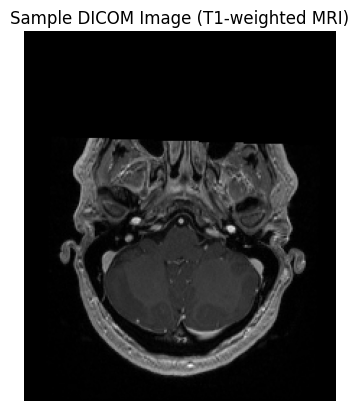

In [2]:
# Path to a sample DICOM file
dicom_file = "/content/data/ReMIND/sub-001/anat/T1w/1-145.dcm"

# Read DICOM file using pydicom
dicom_data = pydicom.dcmread(dicom_file)

# Extract pixel array from the DICOM data
image = dicom_data.pixel_array
print(f"Original Image shape: {image.shape}")

# Visualize the image
plt.imshow(image, cmap='gray')
plt.title("Sample DICOM Image (T1-weighted MRI)")
plt.axis("off")
plt.show()

## Convert Image to PyTorch Tensor and Preprocess

- Convert image pixel values to float32 for PyTorch compatibility

- Use torchvision transforms to:
  
   Convert the image to tensor (automatically scales pixels to [0,1])

   Resize the image to a fixed size suitable for CNN input (128x128)

   Normalize the tensor values to [-1, 1] to speed up and stabilize training

In [3]:
# Convert image to float32 numpy array
image = image.astype("float32")

# Compose preprocessing transforms
transform = transforms.Compose([
    transforms.ToTensor(),                    # Convert to tensor and scale pixels to [0,1]
    transforms.Resize((128, 128)),            # Resize to 128x128 (C, H, W)
    transforms.Normalize(mean=[0.5], std=[0.5])  # Normalize to [-1, 1]
])

# Apply transforms and add batch dimension (1, Channels, H, W)
image_tensor = transform(image).unsqueeze(0)

print("Processed tensor shape:", image_tensor.shape)
print("Tensor dtype:", image_tensor.dtype)


Processed tensor shape: torch.Size([1, 1, 128, 128])
Tensor dtype: torch.float32


## Display Important DICOM Metadata
Understanding the metadata is crucial for medical imaging analysis:

In [18]:
# Show a few key DICOM metadata fields
print("Patient ID:", dicom_data.get("PatientID", "Unknown"))
print("Modality:", dicom_data.get("Modality", "Unknown"))
print("Study Date:", dicom_data.get("StudyDate", "Unknown"))
print("Manufacturer:", dicom_data.get("Manufacturer", "Unknown"))

# Some acquisition parameters
print("Image Dimensions (rows x columns):", dicom_data.Rows, "x", dicom_data.Columns)
print("Pixel Spacing (mm):", dicom_data.get("PixelSpacing", "Unknown"))
print("Slice Thickness (mm):", dicom_data.get("SliceThickness", "Unknown"))

# Number of bits per pixel
print("Bits Stored:", dicom_data.get("BitsStored", "Unknown"))

# Optional: print all tags
# print(dicom_data)


Patient ID: ReMIND-001
Modality: MR
Study Date: 19821225
Manufacturer: Unknown manufacturer
Image Dimensions (rows x columns): 256 x 216
Pixel Spacing (mm): [.976562578063547, .976562594935198]
Slice Thickness (mm): 1
Bits Stored: 16


## Moving the Tensor to GPU for Model Inference or Training

PyTorch models train faster on GPUs. Here's how to prepare the tensor:

In [8]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Move tensor to device
image_tensor = image_tensor.to(device)

Using device: cuda
